In [12]:
##loading dependencies
!pip install xlrd matplotlib numpy scipy > /dev/null 2>&1

# Signing at the beginning makes ethics salient and decreases dishonest self-reports in comparison to signing at the end

Credit: @Data Colada


In many areas of life, companies and governments rely on systems of trust which are often susceptible to misuse. Take for example tax reporting. The IRS has identified a significant tax gap of between $ \$400$ and $ \$700$ billion, with roughly 80% attributed to underreported income on tax forms.

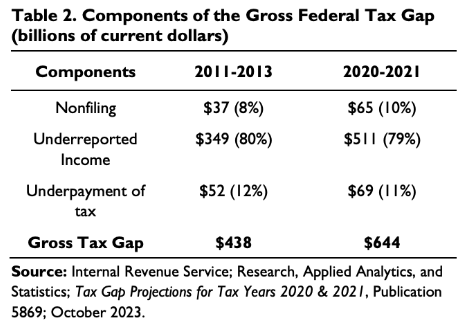


Your peers have come up with a clever idea which may be able to address this far reaching problem – what if instead of the standard honesty pledge at the bottom of a form we included it at the top?

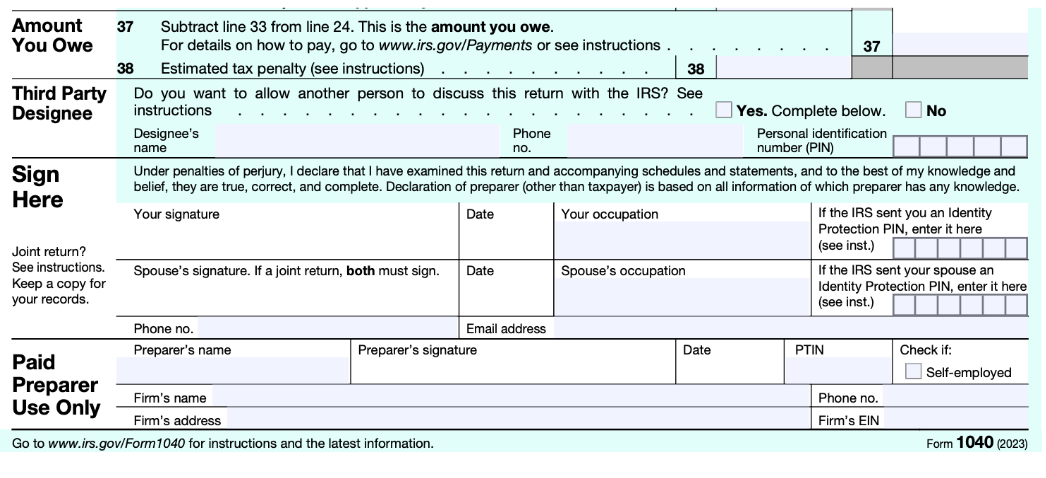
<center>
    <i>
    Example of the IRS form 1040 with the “honesty pledge” at the bottom.
        </i>
</center>


After all, having individuals sign an honesty pledge at the top of a document can prompt early self-reflection and align their behaviors with societal honesty norms before starting the task – potentially increasing accurate reporting. In contrast, a pledge at the bottom may be less effective, as it comes after actions have already been taken, reducing its impact on behavior.

Given this information we seek to construct a field experiment to test our hypothesis. Partnering with an insurance firm we seek to test our hypothesis that signing a honesty pledge at the top of some self reported document increases honesty in self reporting odometer mileage for car insurance.


**Question 1**
How would you design such an experiment to test our hypothesis? Give a brief heuristic outline.

*Replace This Text*

One of your peers has conducted the experiment and collected the data as follows: In the study, N = 13,488 drivers who were renewing their insurance were randomly sent one of two policy review forms randomly: one featuring the standard placement of the statement "I promise that the information I am providing is true" at the document's bottom, while the other had the statement relocated to the top.

In the forms, they were asked to report the odometer mileage of their cars covered by the insurer, based on the reasoning that individuals are inherently motivated to lie on these forms, as reporting lower mileage implies lower insurance premiums. Remeber, our claim was that those who signed at the top were less inclined to lie than those who signed at the bottom.

The study utilized a datafile from an insurance company containing policy identifiers, experimental conditions, and two sets of odometer readings per car, without the dates of the initial readings – this may create some noise in the data. Odom Reading $x$ (Previous) refers to the mileage that had been previously reported for the vehicle provided by the insurance firm and Odom reading $x$ (Update) is our dependent variable which is the new self-reported mileage after the sign top or sign bottom form was administered during the renewal. 


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.read_excel('DrivingdataAll.xls')
df

,OMR Version,Policy # (masked),Odom Reading 1 (Previous),Odom Reading 1 (Update),Odom Reading 2 (Previous),Odom Reading 2 (Update),Odom Reading 3 (Previous),Odom Reading 3 (Update),Odom Reading 4 (Previous),Odom Reading 4 (Update),Odom Reading All (Previous),Odom Reading All (Update),Diff All,Count1,Count2,Count3,Count4,#Cars in Policy
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,896.0,39198.0,38302.0,1,0,0,0,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,27027.5,55558.0,28530.5,1,1,0,0,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,33169.0,48231.0,15062.0,1,1,0,0,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,23912.0,59136.0,35224.0,1,0,0,0,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,16862.0,59292.0,42430.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,31680.5,54183.5,22503.0,1,1,0,0,2
13484,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,11536.5,41911.5,30375.0,1,0,0,1,2
13485,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,60190.0,86243.0,26053.0,1,1,0,0,2
13486,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,29884.0,35459.0,5575.0,1,0,0,0,1


**Question 2**
How should we construct our alternative hypothesis?

*Replace This Text*

**Task 1**
Let's just consider the first car, remember we wish to test to see if there is a difference between our two groups sign top and sign bottom. First find the mean and standard deviation in the difference for "Odom Reading 1 (Update)" and "Odom Reading 1 (Previous)" between the two groups. Then test your hypothesis using a T-Test or F-Test.

In [25]:
###Sample Solution
df['Difference'] = df['Odom Reading 1 (Update)'] - df['Odom Reading 1 (Previous)']

df_top = df[df['OMR Version'] == 'Sign Top']
df_bottom = df[df['OMR Version'] == 'Sign Bottom']

mean_top = df_top['Difference'].mean()
sd_top = df_top['Difference'].std()

mean_bottom = df_bottom['Difference'].mean()
sd_bottom = df_bottom['Difference'].std()

print(f"Top Signers Mean: {mean_top}, SD: {sd_top}")
print(f"Bottom Signers Mean: {mean_bottom}, SD: {sd_bottom}")

from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(df_top['Difference'], df_bottom['Difference'], equal_var=False)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

Top Signers Mean: 26204.828253223917, SD: 14226.320846470471
Bottom Signers Mean: 23622.54606842737, SD: 14505.809749260587
T-Statistic: 10.435384094913234
P-Value: 2.136361705729285e-25


**Question 3** Based on your results should we reject our null hypothesis? What does this tell us about signing at the top vs the bottom and how certain are you of our effect size? How should companies and agencies interpret these results and act upon it?

*Replace This Text*

**Question 4**
Now: take the role of a [peer-reviewer](https://www.pnas.org/reviewer). Please reflect and evaluate the research design, collection, analysis and outcome of our findings above. Are there any inconsistencies that immediately stand out?

*Replace This Text*

Sometimes, faults in studies aren't in their design but rather in the interpretation or underlying data of the experiment. In this lab we'll learn about pathological science and fraudulent and tools we can use to detect them and why certain researchers may be incentivized or pushed to output fraudulent or pathological science papers.

# Investigation #1: Random Assignment?
Why is it important for treatments to be randomly assigned? Recall when we evaluated our mean and standard devation of differences of each group. 

**Question 5**
If the treatments were randomly assigned would we expect the baseline means (Previous columns) to be similar or not? 

*Replace This Text*

**Task 2** Calculate the mean and SD for our previous columns for each of our groups (sign top and sign bottom)

In [29]:
##Your code here.

**Question 6** Do these figures match your expectations? Does it suggest the experiment used random assignment effectively?

*Replace This Text*

# Investigation #2: Distribution of Miles Driven
How would you expect the distribution of miles driven between a year to be?

*Replace This Text*

Now let's investigate what our paper's data shows:

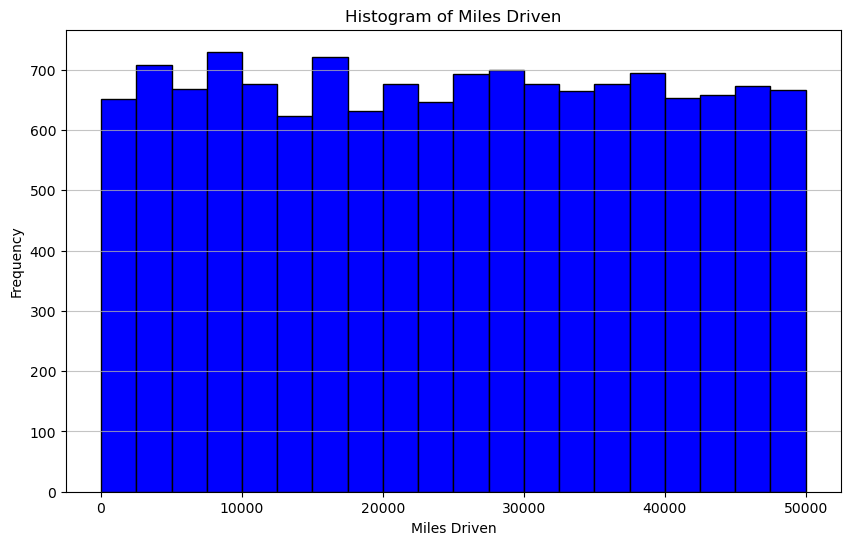

In [20]:
df['Miles Driven'] = df['Odom Reading 1 (Update)'] - df['Odom Reading 1 (Previous)']
df = df.dropna(subset=['Miles Driven'])
df['Miles Driven'] = df['Miles Driven'].clip(lower=0, upper=999999999)
plt.figure(figsize=(10, 6))
plt.hist(df['Miles Driven'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Miles Driven')
plt.xlabel('Miles Driven')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

/tmp/ipykernel_129/2323148507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Miles Driven'] = df_top['Odom Reading 1 (Update)'] - df_top['Odom Reading 1 (Previous)']
/tmp/ipykernel_129/2323148507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bottom['Miles Driven'] = df_bottom['Odom Reading 1 (Update)'] - df_bottom['Odom Reading 1 (Previous)']


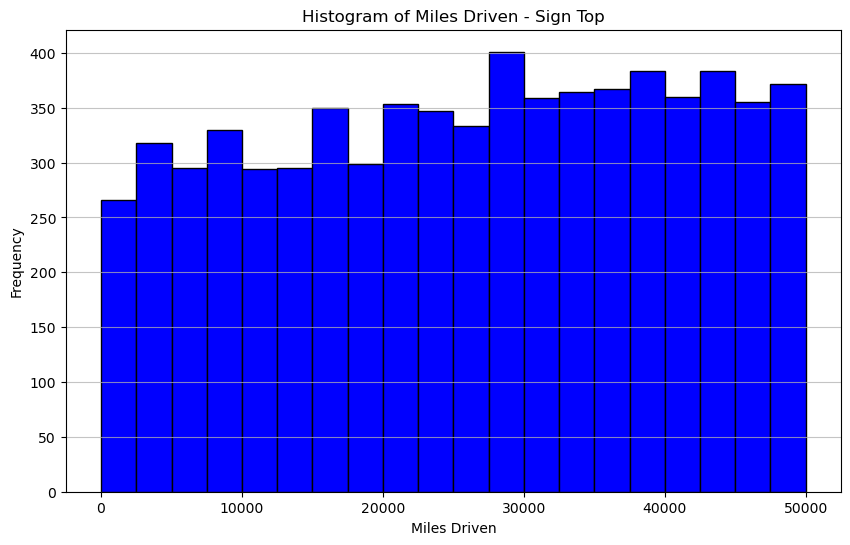

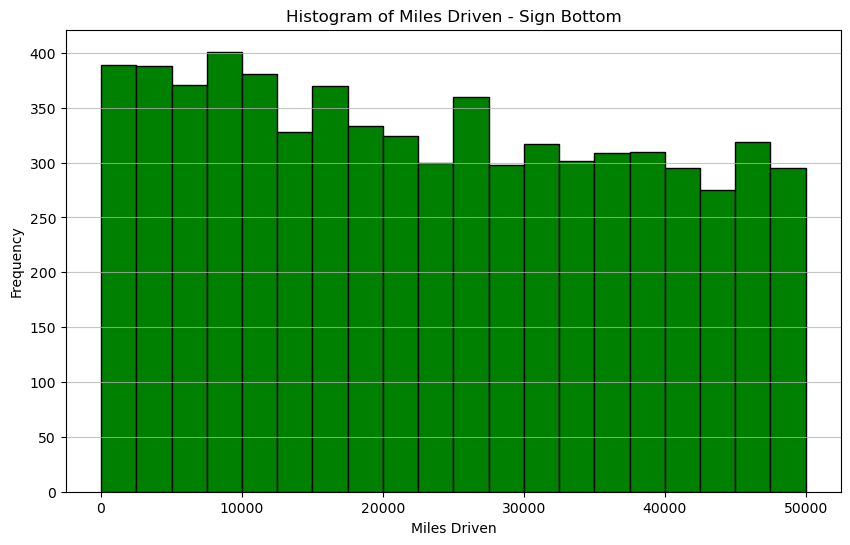

In [21]:
# sign top data
df_top = df[df['OMR Version'] == 'Sign Top']
df_top['Miles Driven'] = df_top['Odom Reading 1 (Update)'] - df_top['Odom Reading 1 (Previous)']

# sign bottom data
df_bottom = df[df['OMR Version'] == 'Sign Bottom']
df_bottom['Miles Driven'] = df_bottom['Odom Reading 1 (Update)'] - df_bottom['Odom Reading 1 (Previous)']

# graph sign top
plt.figure(figsize=(10, 6))
plt.hist(df_top['Miles Driven'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Miles Driven - Sign Top')
plt.xlabel('Miles Driven')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# graph sign bottom
plt.figure(figsize=(10, 6))
plt.hist(df_bottom['Miles Driven'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Miles Driven - Sign Bottom')
plt.xlabel('Miles Driven')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Do these distributions match your expectations? Why or why not?

*Replace This Text*

# Investigation #3 Last Digit Analysis 